# Estudando Pandas

In [0]:
#Importação do pandas
import pandas as pd

## Importar csv direto do Google Drive




In [0]:
# Instale o PyDrive
!pip install -U -q PyDrive

In [0]:
# Faça o import das bibliotecas de autenticação e permissão do Google
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Faça a autenticação com sua conta do Google e crie o PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Pegue o link do dataset CSV que vc deseja usar 
link = 'https://drive.google.com/open?id=1JNOjcLoA7rMUHdRT8KsMVky1aW_gok1M'

In [0]:
# Vamos  usar somente o ID, então separe o que tiver antes do símbolo =
fluff, id = link.split('=')
print(id)

1JNOjcLoA7rMUHdRT8KsMVky1aW_gok1M


In [0]:
# Carregando o dataset para um DataFrame Pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kc_house_data.csv')
data = pd.read_csv('kc_house_data.csv')

## Fazer leitura do csv da pasta local



In [0]:
# Leitura de um arquivo .csv (sep = separador dos dados; header =  informar em qual linha está o cabeçalho do arquivo- header=None => pandas gera um número como header)
file = '../databases/kc_house_data.csv' #Declarando o caminho do arquivo a ser usado nos testes
data = pd.read_csv(file, sep=',', header=0)
type(data) #Criou um objeto do tipo DataFrame

pandas.core.frame.DataFrame

In [0]:
# Imprime as 5 primeiras linhas do dataset
data.head()
#Imprime as 100 primeiras linhas
# data.head(100)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Imprime as 5 últimas linhas do dataset
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [0]:
# Imprime uma amostra aleatória do dataset
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13571,1026069061,20150129T000000,682000.0,4.0,2.50,3600,203425,2.0,0,0,3,9,3400,200,1979,0,98077,47.7597,-122.018,3150,202989
825,4006000251,20140822T000000,226000.0,3.0,1.00,970,5000,1.0,0,0,3,6,970,0,1968,0,98118,47.5282,-122.279,1290,5875
16616,1626069102,20150323T000000,500000.0,4.0,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
11109,4337000070,20150309T000000,200000.0,3.0,1.00,930,7590,1.0,0,0,3,6,820,110,1943,0,98166,47.4802,-122.335,1220,7590
5360,8665050080,20141010T000000,445000.0,3.0,2.50,1730,4408,2.0,0,0,3,8,1730,0,1996,0,98029,47.5683,-122.005,1730,4408


In [0]:
# Imprime o formato do dataset (linhas e colunas)
data.shape

(21613, 21)

In [0]:
# Imprime o nome das colunas do dataset
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
# Imprime a quantidade de linhas para cada coluna
data.count()

id               21613
date             21613
price            21613
bedrooms         21609
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21612
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [0]:
# Exibe informações estatísticas da base de dados (desvio padrão, média, valor mínimo, valor máximo)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21609.000000,21613.000000,21613.000000,2.161300e+04,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370910,2.114757,2079.899736,1.510697e+04,1.494332,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930084,0.770163,918.440897,4.142051e+04,0.539991,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
# Exibe informações sobre as colunas e uso de memória
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21609 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21612 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 3.5+ MB


In [0]:
# Criar dataframe com colunas indexadas (para organizar dados por data por exemplo)
data = pd.read_csv(file, sep=',', index_col='date')

In [0]:
# Carregando o dataset para um DataFrame Pandas do Google Drive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kc_house_data.csv')
data = pd.read_csv('kc_house_data.csv', sep=',', index_col='date')

In [0]:
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
20141013T000000,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
20141209T000000,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
20150225T000000,5631500400,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
20141209T000000,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
20150218T000000,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Selecionar e usar somente algumas informações do arquivo
data =  pd.read_csv(file, sep=',', usecols=['id','date','price','bedrooms'])

In [0]:
# Carregando o dataset para um DataFrame Pandas do Google Drive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kc_house_data.csv')
data = pd.read_csv('kc_house_data.csv', sep=',',usecols=['id','date','price','bedrooms'])

In [0]:
data.head()

,id,date,price,bedrooms
0,7129300520,20141013T000000,221900.0,3.0
1,6414100192,20141209T000000,538000.0,3.0
2,5631500400,20150225T000000,180000.0,2.0
3,2487200875,20141209T000000,604000.0,4.0
4,1954400510,20150218T000000,510000.0,3.0


## Trabalhando com Arquivos Grandes

* Quando estamos trabalhando com _**Grandes Arquivos**_ temos um grande desafio que é gerenciar a memória,
* As vezes precisamos manipular uma base de dados muito grande e por isso precisamos trabalhar com arquivos de forma diferente.
* Uma forma é ler esses arquivos de forma limitada para não consumir toda a _**memória**_ do servidor.

In [0]:
# Leitura das 5 primeiras linhas de um arquivo
dataset = pd.read_csv(file, sep=',', nrows=5)
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
# Carregando o dataset para um DataFrame Pandas do Google Drive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kc_house_data.csv')
data = pd.read_csv('kc_house_data.csv', sep=',',nrows=5)

NameError: name 'drive' is not defined

In [0]:
data

,id,date,price,bedrooms
0,7129300520,20141013T000000,221900.0,3.0
1,6414100192,20141209T000000,538000.0,3.0
2,5631500400,20150225T000000,180000.0,2.0
3,2487200875,20141209T000000,604000.0,4.0
4,1954400510,20150218T000000,510000.0,3.0
5,7237550310,20140512T000000,1225000.0,4.0
6,1321400060,20140627T000000,257500.0,3.0
7,2008000270,20150115T000000,291850.0,3.0
8,2414600126,20150415T000000,229500.0,3.0
9,3793500160,20150312T000000,323000.0,3.0


In [0]:
# Separar os dados em blocos (chunk) para leitura (lê o arquivo em partes e libera espaço após ler cada bloco)
chunk = pd.read_csv(file, chunksize=10000)
#type(chunk)

FileNotFoundError: ignored

In [0]:
# Carregando o dataset para um DataFrame Pandas do Google Drive em blocos (chunk) para leitura (lê o arquivo em partes e libera espaço após ler cada bloco)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kc_house_data.csv')
chunk = pd.read_csv('kc_house_data.csv', chunksize=10000)

In [0]:
#Imprimir o tamanho de cada bloco (chunk) gerado para o arquivo
qt = 1
for parte in chunk:
    print("Parte {}: {}".format(qt,len(parte)))
    qt += 1

Parte 1: 10000
Parte 2: 10000
Parte 3: 1613


In [0]:
# Iterar em cada parte do arquivo e adicionar o valor processado a uma nova coluna do dataset já existente
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('kc_house_data.csv')
chunk = pd.read_csv('kc_house_data.csv', chunksize=10000)

lista = []
  
for parte in chunk:
    lista.append(parte['bedrooms'] * 2)
    
data['bedrooms_size'] = pd.concat(lista)

In [0]:
# Iterar em cada parte do arquivo e adicionar o valor processado a uma nova coluna do dataset já existente
lista = []
  
for parte in chunk:
    lista.append(parte['bedrooms'] * 2)

data['bedrooms_size'] = pd.concat(lista)

In [0]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,6.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6.0


## Consultar e alterar um DataFrame

* Consultas em DataFrames se _**assemelham**_ a linhagem SQL.
* Existem métodos interessantes para fazer consultas usando operadores lógicos _**(>,<,== )**_.
* Além disso podemos fazer consultas usando instruções de agrupamento, por exemplo. 

In [0]:
# Quantificar valores únicos
pd.value_counts(data['bedrooms']) # Ex: 9822 imóveis com 3 quartos 

3.0     9822
4.0     6881
2.0     2759
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

In [0]:
# Pesquisar por padrões no dataset usando o método loc
data.loc[data['bedrooms'] == 3] #buscar registros de imóveis com 3 quartos

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,6.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6.0
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,6.0
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,507250.0,3.0,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,6.0
21604,9834201367,20150126T000000,429000.0,3.0,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,6.0
21607,2997800021,20150219T000000,475000.0,3.0,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,6.0
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6.0


In [0]:
# Filtrando casas com mais de 3 quartos
data[data['bedrooms'] == 3] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,6.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6.0
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,6.0
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,507250.0,3.0,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,6.0
21604,9834201367,20150126T000000,429000.0,3.0,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,6.0
21607,2997800021,20150219T000000,475000.0,3.0,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,6.0
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6.0


In [0]:
# Usando o loc com uma condição composta 
data.loc[(data['bedrooms'] == 3) & (data['bathrooms'] > 2)] #buscar registros de imóveis com 3 quartos e mais de 2 banheiros

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6.0
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,6.0
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,6.0
10,1736800520,20150403T000000,662500.0,3.0,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,6.0
21,2524049179,20140826T000000,2000000.0,3.0,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,5100403806,20150407T000000,467000.0,3.0,2.50,1425,1179,3.0,0,0,3,8,1425,0,2008,0,98125,47.6963,-122.318,1285,1253,6.0
21603,7852140040,20140825T000000,507250.0,3.0,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,6.0
21607,2997800021,20150219T000000,475000.0,3.0,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,6.0
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6.0


In [0]:
# Ordenar o retorno de uma consulta por um ou mais campos específicos (Ordena somente a coluna, não o dataset definitivamente)
data.sort_values(by='price', ascending=False) #Mais caro vem primeiro (Decrescente)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,12.0
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,10.0
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,12.0
4411,2470100110,20140804T000000,5570000.0,5.0,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,10.0
1448,8907500070,20150413T000000,5350000.0,5.0,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3.0,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,6.0
16198,3028200080,20150324T000000,81000.0,2.0,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000,4.0
465,8658300340,20140523T000000,80000.0,1.0,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500,2.0
15293,40000362,20140506T000000,78000.0,2.0,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387,4.0


In [0]:
# Contar o número de linhas de uma consulta
data[data['bedrooms']==4].count()

id               6881
date             6881
price            6881
bedrooms         6881
bathrooms        6881
sqft_living      6881
sqft_lot         6881
floors           6881
waterfront       6881
view             6881
condition        6881
grade            6881
sqft_above       6881
sqft_basement    6881
yr_built         6881
yr_renovated     6881
zipcode          6881
lat              6881
long             6881
sqft_living15    6881
sqft_lot15       6881
bedrooms_size    6881
dtype: int64

## Alterando o dataset

In [0]:
# Adicionar nova coluna ao DataFrame
data['size'] = (data['bedrooms'] * 20)
# Visualizar conteúdo da coluna criada
data['size'].head()

0    60.0
1    60.0
2    40.0
3    80.0
4    60.0
Name: size, dtype: float64

In [0]:
# Função para processamento de dados
def categoriza(s):
    if s >= 80:
        return 'Big'
    elif s >= 60:
        return 'Medium'
    elif s >= 40:
        return 'Small'

In [0]:
# Criando uma nova coluna a partir do processamento realizado
data['cat_size'] = data['size'].apply(categoriza) #Aplica o método e categoriza o valor, substituindo-o pela string
# Visualizando a nova coluna criada.
data['cat_size'].head()

0    Medium
1    Medium
2     Small
3       Big
4    Medium
Name: cat_size, dtype: object

In [0]:
# Ver a distribuição da coluna com o método value_counts
pd.value_counts(data['cat_size']) # Mostra quantos registros há por categoria (Small, Medium e Big)

Medium    9822
Big       8816
Small     2759
Name: cat_size, dtype: int64

In [0]:
# Excluir dados no DataFrame
# A opção axis=1 define que queremos excluir uma coluna e não uma linha (axis = 0).
# O parâmetro inplace define que a alteração irá modificar o objeto em memória.
data.drop(['cat_size'], axis=1, inplace=True) # Apaga a coluna cat_size no objeto original
# Visualizar dataset após apagar
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size,size
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,6.0,60.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6.0,60.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4.0,40.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8.0,80.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6.0,60.0


In [0]:
# Apagando a coluna 'size'
data.drop(['size'], axis=1, inplace=True)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,6.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6.0


**Apagando linhas baseado em condições lógicas!**

In [0]:
# Dropa linhas com bedrooms == 0
data.drop(data[data.bedrooms==0].index,inplace=True) 
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,6.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,4.0
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,6.0


In [0]:
# Dropa linhas com nº de bedrooms maiores que 30
data.drop(data[data.bedrooms>30].index ,inplace=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_size
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,6.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,6.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,6.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,4.0
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,6.0


# Valores Faltantes (Missing Values)

* **Missing Values** são valores faltantes em colunas, esses podem ser oriundos de falhas em cargas de dados, falhas em crawlers ou até mesmo corrupção de dados.

* Missing Values podem ser um problema em várias situações, como por exemplo, algoritmos de machine learning que não trabalham bem com dados faltantes.

* Estes também podem atrapalhar resultados de análises.

* Vamos aprender como encontrar missing values na base de dados e como manipular esses valores.

In [0]:
dataset = pd.read_csv(file, sep=',', header=0)

FileNotFoundError: ignored

In [0]:
dataset = data

In [0]:
# Consultar linhas com valor vazio
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
bedrooms_size    4
dtype: int64

In [0]:
#Remover todas as linhas onde tenha pela menos um registro faltante em algum atributo. Se um atributo for nulo, apaga
dataset.dropna(inplace=True)

In [0]:
#Remover somente linhas que estejam com valores faltantes em todas as colunas
dataset.dropna(how='all', inplace=True)

In [0]:
#preencher os valores nulos da coluna floors com a media de todos os valores contidos na coluna floors
dataset['floors'].fillna(dataset['floors'].mean(), inplace=True)

In [0]:
#preenche com 1 os values null da coluna bedrooms
dataset['bedrooms'].fillna(1, inplace=True)

## Estatística Descritiva

In [0]:
# Imprime o valor médio da coluna bedrooms
dataset['bedrooms'].mean()

3.371631008613504

In [0]:
# Imprime o valor máximo da coluna bedrooms
dataset['bedrooms'].max()

11.0

In [0]:
# Imprime o valor mínimo da coluna bedrooms
dataset['bedrooms'].min()

1.0

In [0]:
# Imprime o desvio padrão da coluna bedrooms
dataset['bedrooms'].std()

0.9044741584254177

In [0]:
#Esse método retorna o valor de simetria de cada coluna do dataset.
# Um valor zero indica uma distribuição simétrica
# Um valor maior que zero ou menor indica uma distribuição assimétrica.
# Valores acima de zero podemos dizer que existe uma assimetria positiva 
# Valores abaixo de zero uma assimetria negativa.
# Isso quer dizer que valores muito acima de zero indicam que existem mais valores acima da média
# valores abaixo de zero significa que contém mais valores abaixo da média.

print('Simetria: {}'.format(dataset['bedrooms'].skew())) # a maioria dos imóveis possui a quantidade de quartos acima da média (mais que 3 quartos) 

media = dataset['bedrooms'].mean()
print('Média: {}'.format(media))

print('Qtd de registros acima da média: {}'.format((dataset.filter(like='bedrooms').sum(axis=1) >= media).sum())) # Contabilização da quantidade de registros com o valor maior/igual a média


pd.value_counts(dataset['bedrooms']) # Mostra a distribuição por nº de quartos

Simetria: 0.5492363750588078
Média: 3.371631008613504
Qtd de registros acima da média: 21395


3.0     9822
4.0     6881
2.0     2758
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
Name: bedrooms, dtype: int64

In [0]:
# Verificar a assimetria ou simetria de todo o dataset ( verificar se a base está bem balanceada -  dados muito abaixo ou muito acima das médias)
dataset.skew()

id                0.243124
price             4.025413
bedrooms          0.549236
bathrooms         0.517259
sqft_living       1.472577
sqft_lot         13.071175
floors            0.614843
waterfront       11.379988
view              3.395943
condition         1.035606
grade             0.781707
sqft_above        1.447223
sqft_basement     1.576876
yr_built         -0.469314
yr_renovated      4.547212
zipcode           0.405452
lat              -0.485775
long              0.885057
sqft_living15     1.106893
sqft_lot15        9.522705
bedrooms_size     0.549236
dtype: float64

# **Extraindo Insights**

* Utilizando os gráficos do tipo Boxplot, que são excelentes ferramentas de análise de dados, principalmente para identificar _**outliers**_.

In [0]:
# Importando a biblioteca Matplotlib
import matplotlib 

In [0]:
# Plota gráfico do tipo Boxplot da coluna bedrooms
# Esse gráfico é muito rico e é possível visualizar Outliers - Em estatística, outlier, valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série (que está "fora" dela), ou que é inconsistente. 
# Outlier é constituído pelos valores: Q1 ( quartil1 - valor médio de 25% dos dados - borda inferior do retângulo)
# Q2 (quartil 2 - mediana (valor central) - Linha ao meio do retângulo ), 
# Q3 (quartil 3 - valor médio de 75% dos dados), 
# Linhas superior e inferior extra ao retângulo (máximo e mínimo valores dos dados)
%matplotlib notebook
matplotlib.style.use('ggplot') # Estilo diferente do padrão

dataset.boxplot(column='bedrooms')

<IPython.core.display.Javascript object>

In [0]:
# Visualizando os estilos de layout disponível
matplotlib.style.available

['seaborn-bright',
 'ggplot',
 'seaborn-notebook',
 'seaborn',
 'grayscale',
 'dark_background',
 'fast',
 'seaborn-talk',
 'tableau-colorblind10',
 'seaborn-pastel',
 'seaborn-paper',
 'seaborn-ticks',
 'bmh',
 'classic',
 'seaborn-white',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-muted',
 '_classic_test',
 'Solarize_Light2',
 'seaborn-poster',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight']

In [0]:
# Plota boxplot da coluna 'price' por número de quartos
%matplotlib notebook
dataset.boxplot(column='price', by='bedrooms') #Permite visualizar se o preço para um imóvel com um determinado nº de quartos é um outlier

<IPython.core.display.Javascript object>

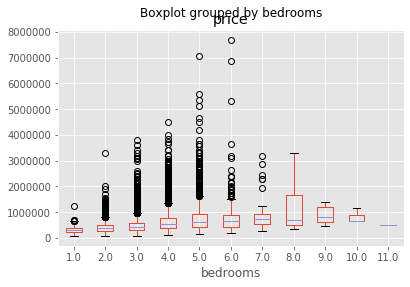

In [0]:
# Plota boxplot da coluna 'price' por número de quartos
%matplotlib inline
dataset.boxplot(column='price', by='bedrooms') #Permite visualizar se o preço para um imóvel com um determinado nº de quartos é um outlier

## Trabalhando com Correlações

In [0]:
# Correlação de variáveis = se um valor x depende de outro valor y e se aumentar x, y também aumenta
# Se reduzir x, y diminui ou se aumentar x, y diminui ou vice e versa
# Imprime a correlação de todas as colunas do dataframe (person)
dataset.corr() #pearson

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016763,0.001345,0.005402,-0.012116,-0.132130,0.018751,-0.002717,0.011610,-0.023791,0.008244,-0.010675,-0.005170,0.021532,-0.016899,-0.008267,-0.001911,0.020944,-0.002721,-0.138825
price,-0.016763,1.000000,0.308323,0.525191,0.702060,0.089630,0.256885,0.266372,0.397274,0.036347,0.667424,0.605628,0.323753,0.054084,0.126410,-0.053330,0.306911,0.021593,0.585443,0.082410
bedrooms,0.001345,0.308323,1.000000,0.515881,0.576653,0.031671,0.175440,-0.006596,0.079499,0.028598,0.356954,0.477579,0.303094,0.154141,0.018813,-0.152669,-0.008900,0.129467,0.391633,0.029206
bathrooms,0.005402,0.525191,0.515881,1.000000,0.754642,0.087739,0.500584,0.063744,0.187735,-0.124963,0.664980,0.685298,0.283805,0.505985,0.050728,-0.203879,0.024593,0.222956,0.568570,0.087176
sqft_living,-0.012116,0.702060,0.576653,0.754642,1.000000,0.172818,0.353914,0.103816,0.284602,-0.058715,0.762691,0.876590,0.435055,0.318020,0.055346,-0.199474,0.052516,0.240158,0.756401,0.183278
sqft_lot,-0.132130,0.089630,0.031671,0.087739,0.172818,1.000000,-0.005182,0.021599,0.074694,-0.008956,0.113602,0.183520,0.015257,0.053104,0.007632,-0.129619,-0.085744,0.229526,0.144617,0.718552
floors,0.018751,0.256885,0.175440,0.500584,0.353914,-0.005182,1.000000,0.023705,0.029461,-0.263785,0.458212,0.523839,-0.245680,0.489251,0.006349,-0.059037,0.049735,0.125346,0.279790,-0.011244
waterfront,-0.002717,0.266372,-0.006596,0.063744,0.103816,0.021599,0.023705,1.000000,0.401856,0.016654,0.082769,0.072076,0.080581,-0.026158,0.092881,0.030276,-0.014294,-0.041917,0.086467,0.030698
view,0.011610,0.397274,0.079499,0.187735,0.284602,0.074694,0.029461,0.401856,1.000000,0.045992,0.251301,0.167649,0.276924,-0.053426,0.103904,0.084796,0.006099,-0.078421,0.280453,0.072557
condition,-0.023791,0.036347,0.028598,-0.124963,-0.058715,-0.008956,-0.263785,0.016654,0.045992,1.000000,-0.144695,-0.158169,0.174093,-0.361380,-0.060623,0.002923,-0.015112,-0.106518,-0.092787,-0.003400


In [0]:
# Imprime a correlação de spearman (esta leva em consideração a correção positiva e negativa)
dataset.corr('spearman')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004156,0.006297,0.015279,0.001839,-0.116931,0.019067,-0.003568,0.012570,-0.023965,0.019967,0.003761,0.001348,0.026694,-0.017466,-0.005363,-0.003774,0.007583,0.000197,-0.114888
price,0.004156,1.000000,0.344644,0.497277,0.644293,0.074807,0.322544,0.115096,0.293919,0.018463,0.658230,0.541926,0.251580,0.102168,0.101849,-0.008970,0.456244,0.063508,0.572462,0.062636
bedrooms,0.006297,0.344644,1.000000,0.521397,0.647359,0.216448,0.227565,-0.007611,0.081387,0.012836,0.380530,0.539697,0.230545,0.179964,0.016849,-0.167158,-0.021159,0.191403,0.443827,0.201499
bathrooms,0.015279,0.497277,0.521397,1.000000,0.745477,0.068895,0.546725,0.049523,0.155550,-0.162851,0.658191,0.690928,0.191940,0.566933,0.042682,-0.204798,0.008337,0.261438,0.570203,0.063213
sqft_living,0.001839,0.644293,0.647359,0.745477,1.000000,0.304244,0.401202,0.070328,0.232996,-0.062560,0.716383,0.843472,0.327962,0.352349,0.052665,-0.206889,0.031000,0.284489,0.746938,0.283961
sqft_lot,-0.116931,0.074807,0.216448,0.068895,0.304244,1.000000,-0.234297,0.085601,0.116992,0.114802,0.152064,0.272558,0.036541,-0.037441,0.008501,-0.319648,-0.122190,0.370683,0.359759,0.922296
floors,0.019067,0.322544,0.227565,0.546725,0.401202,-0.234297,1.000000,0.023887,0.019676,-0.287943,0.501727,0.599207,-0.272401,0.551581,0.012594,-0.061388,0.024701,0.148549,0.305283,-0.231241
waterfront,-0.003568,0.115096,-0.007611,0.049523,0.070328,0.085601,0.023887,1.000000,0.284926,0.016747,0.062187,0.054494,0.051965,-0.028603,0.091645,0.029584,-0.019066,-0.038146,0.074570,0.092272
view,0.012570,0.293919,0.081387,0.155550,0.232996,0.116992,0.019676,0.284926,1.000000,0.046010,0.217030,0.144405,0.236513,-0.066596,0.096525,0.078185,-0.000136,-0.102749,0.255820,0.116480
condition,-0.023965,0.018463,0.012836,-0.162851,-0.062560,0.114802,-0.287943,0.016747,0.046010,1.000000,-0.167387,-0.158060,0.161587,-0.393773,-0.066183,-0.022553,-0.022506,-0.085300,-0.086853,0.117805


In [0]:
# Imprime a correção de algumas colunas mais relevantes
dataset[['bedrooms','bathrooms','sqft_living','floors','waterfront','grade','price']].corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,price
bedrooms,1.000000,0.515881,0.576653,0.175440,-0.006596,0.356954,0.308323
bathrooms,0.515881,1.000000,0.754642,0.500584,0.063744,0.664980,0.525191
sqft_living,0.576653,0.754642,1.000000,0.353914,0.103816,0.762691,0.702060
floors,0.175440,0.500584,0.353914,1.000000,0.023705,0.458212,0.256885
waterfront,-0.006596,0.063744,0.103816,0.023705,1.000000,0.082769,0.266372
grade,0.356954,0.664980,0.762691,0.458212,0.082769,1.000000,0.667424
price,0.308323,0.525191,0.702060,0.256885,0.266372,0.667424,1.000000


<IPython.core.display.Javascript object>


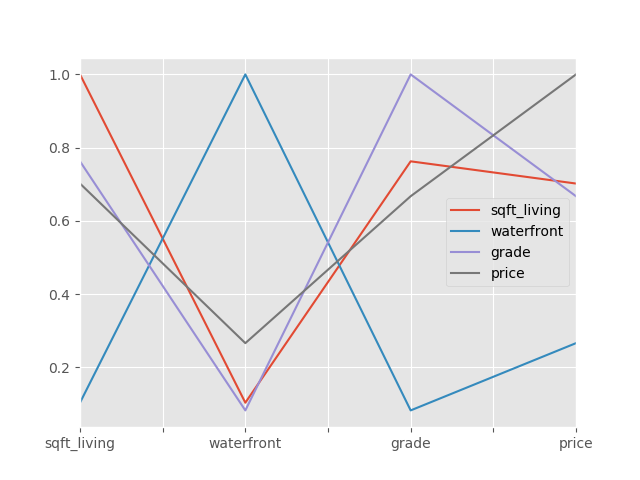

In [0]:
# Plotando a correlação de algumas colunas
%matplotlib notebook
dataset[['sqft_living','waterfront','grade','price']].corr().plot()

## Tabelas Pivot

In [0]:
# Tabelas Pivot são úteis para fazer agrupamento nos dados.
# Conta a quantidade de imóveis agrupados pelas colunas waterfront e floors.
# O parametro index informo as colunas que serão usadas para agregação.
# o parâmetro aggfunc é usado para definir a função de agregação, que poderia ser uma média por exemplo.
# O parâmetro margins=True calcula a quantidade total no final da tabela.

# Muito interessante a performance dessa operação.
#Exemplo: 10622 imóveis tem 1 andar e não tem vista para o mar (waterfront = 0)
dataset.pivot_table('id',index=["waterfront","floors"], aggfunc='count',margins=True) # Margins = True (exibe qtd. total de linhas)

id
waterfront floors       
0          1.0     10621
           1.5      1889
           2.0      8163
           2.5       159
           3.0       605
           3.5         8
1          1.0        57
           1.5        21
           2.0        75
           2.5         2
           3.0         8
All                21608

In [0]:
# Crosstab ou tabulação Cruzada
# Essa funcionalidade cruza valores das variáveis
# Nesse exemplo podemos ver qual a distribuição dos imóveis por número de quartos com relação a sua condição
# Podemos ver que imoveis com 3 quartos estão mais na condição 5
# Condição (1 - Pior condição / 5 - Condição excelente)

pd.crosstab(dataset['bedrooms'],dataset['condition'])

condition,1,2,3,4,5
bedrooms,,,,,
0.0,1,1,10,1,0
1.0,4,11,124,48,12
2.0,12,51,1779,716,200
3.0,8,69,6306,2711,728
4.0,4,36,4579,1682,580
5.0,0,1,1031,418,151
6.0,1,3,158,87,23
7.0,0,0,25,9,4
8.0,0,0,8,3,2


<IPython.core.display.Javascript object>


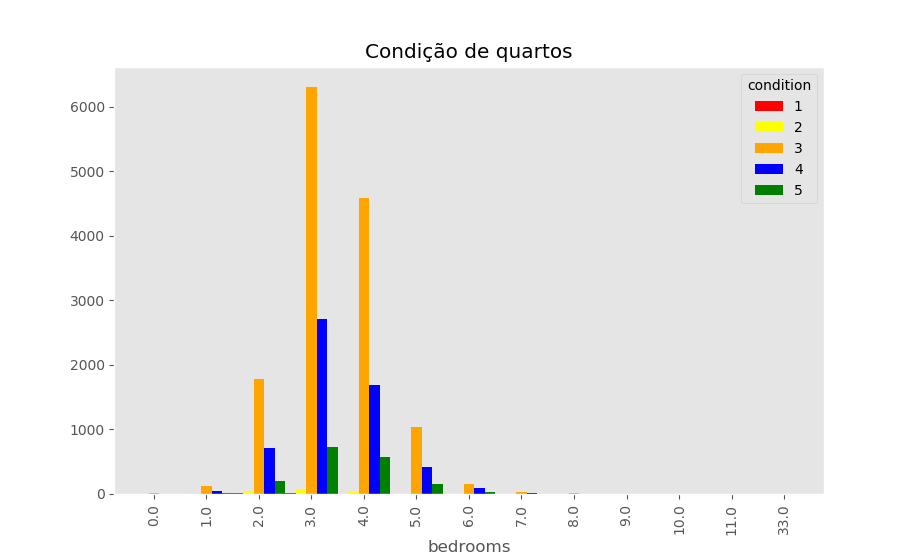

In [0]:
# Plota a tabulação Cruzada
# Usamos o método plot com um gráfico de barras

table = pd.crosstab(dataset['bedrooms'],dataset['condition'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Condição de quartos' ,grid=False)

# _**Trabalhando com Excel**_

* Usar o pandas para manipular planilhas do excel e até mesmo gerar novas planilhas a partir de outros dados.

In [0]:
file = '../databases/Controle-de-Atividades-2.0.xlsx'

In [0]:
#Lendo uma planilha do excel no Pandas.
dataframe_excel = pd.read_excel(file, sheet_name=0,header=1) #sheet_name= nome da planilha ou zero que pega a primeira

In [0]:
dataframe_excel.head()

,N°,Atividade,Responsável,Estado Atual,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Elaborar relatório de vendas,Antonio,ENCERRADA,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Encerrar Balanço,Antonio,INICIADA,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Preparar novo Plano de Contas,Pedro,ADIADA,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
4,4.0,Preparar reunião de resultados,Márcia,ENCERRADA,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


In [0]:
# Lendo o arquivo e indexando pela coluna 'Estado Atual'
dataframe_excel = pd.read_excel(file, sheet_name=0, header=1, index_col=3)

In [0]:
dataframe_excel.head()

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
Estado Atual,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


In [0]:
# Ordenando o dataframe pela coluna de índice. 
dataframe_excel.sort_index()

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
Estado Atual,,,,,,,,,,,,,,,,,,,
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENSA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENCERRADA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIANTADA


# **Gerando Planilhas a partir de Dataframes**

In [0]:
# Gerando uma planilha com algumas colunas
colunas = ['id','price','bedrooms','bathrooms','sqft_living','floors','waterfront']
dataset[colunas].head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,7129300520,221900.0,3.0,1.00,1180,1.0,0
1,6414100192,538000.0,3.0,2.25,2570,2.0,0
2,5631500400,180000.0,2.0,1.00,770,1.0,0
3,2487200875,604000.0,4.0,3.00,1960,1.0,0
4,1954400510,510000.0,3.0,2.00,1680,1.0,0


In [0]:
# Escrevendo no disco a planilha sem o valor do índice (índice numérico gerado automaticamente)
dataset[colunas].to_excel('databases/planilha_pandas.xls',index=False)